In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
from tools import *

# Partie 1 : SIFT

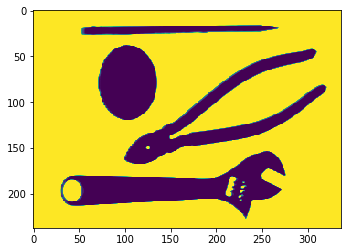

In [3]:
# example images
I = read_grayscale('data/tools.tiff')
I2 = read_grayscale('data/Scene/CALsuburb/image_0205.jpg')
plt.imshow(I)

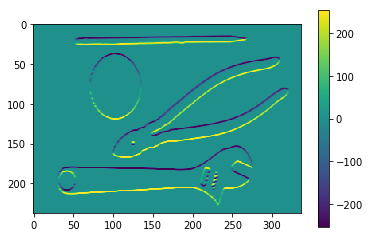

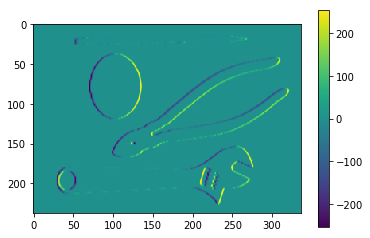

In [6]:
def compute_grad(I):
    h_x = 1/2*np.array([[-1], [0], [1]])
    h_y = 1/2*np.array([[1], [2], [1]])
    Ix = conv_separable(I, h_y, h_x)
    Iy = conv_separable(I, h_x, h_y)
    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [7]:
def compute_grad_mod_ori(I):
    Ix, Iy = compute_grad(I)
    Gm = np.sqrt(Ix*Ix + Iy*Iy)
    Go = compute_grad_ori(Ix, Iy, Gm, b=8)
    return Gm, Go

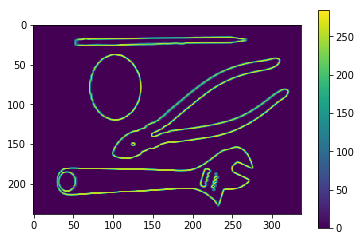

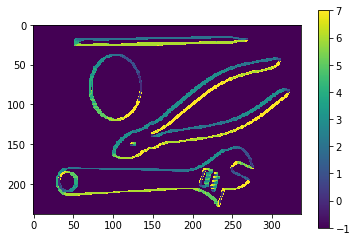

In [8]:
Gm, Go = compute_grad_mod_ori(I)
plt.imshow(Gm)
plt.colorbar()
plt.show()
plt.imshow(Go)
plt.colorbar()
plt.show()

In [9]:
def compute_sift_region(Gm, Go, mask=None):
    # TODO
    sift = []
    # Note: to apply the mask only when given, do:
    if mask is not None:
        Gm = Gm*mask
    for i in range(16):
        subregion_gm = Gm[4*(i//4):4*(i//4)+4, 4*(i%4):4*(i%4)+4]
        subregion_go = Go[4*(i//4):4*(i//4)+4, 4*(i%4):4*(i%4)+4]
        histo = [0]*8
        for j in range(16):
            orientation = subregion_go[j//4, j%4]
            histo[orientation] += subregion_gm[j//4, j%4] 
        sift.extend(histo)
    return sift

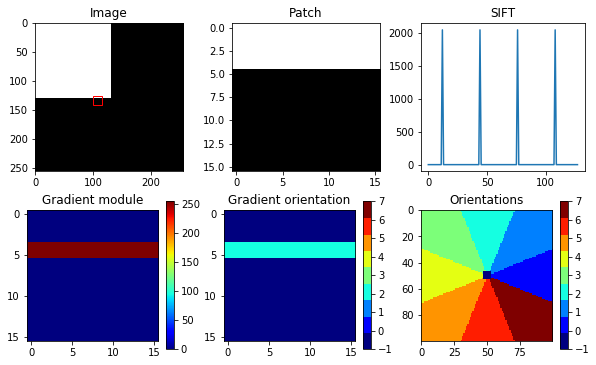

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 2040.0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 2040.0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 2040.0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 2040.0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0]

In [3]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
#display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
#display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [42]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    
    # TODO calculs communs aux patchs
    Gm, Go = compute_grad_mod_ori(im)

    sifts = np.zeros([len(x), len(y), 128])
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #print(xi,yj)
            #print(Gm[xi:xi+16, yj:yj+16])
            sifts[i, j, :] = compute_sift_region(Gm[xi:xi+16, yj:yj+16], Go[xi:xi+16, yj:yj+16], mask=None)
    return sifts

In [43]:
compute_sift_image(I)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Partie 2 : Dictionnaire visuel

In [1]:
# Ideally, restart the Python kernel to start from a clean slate
import os
import numpy as np
from tools import *
from sift import *
from sklearn.cluster import KMeans

In [2]:
# Paths config
dir_sc = os.path.join('data', 'Scene')
dir_sift = os.path.join('data', 'sift')
path_vdict = os.path.join('data', 'kmeans', 'vdict.npy')
path_vdsift = os.path.join('data', 'kmeans', 'vdsift.npy')
path_vdinames = os.path.join('data', 'kmeans', 'vdinames.npy')

inames, ilabls, cnames = load_dataset(dir_sc)

In [7]:
# If you want to look at the SIFTs that will be fed to compute_visual_dict:
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


In [8]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, verbose=verbose, n_jobs=-1).fit(sift)
    cc = kmeans.cluster_centers_
    n = 128
    return np.append(cc, np.zeros(n).reshape(1,n), axis=0)
    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector

In [9]:
# Run the visual dict computation (saved the first time)
vidct = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict
Computing or loading SIFTs
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 182843044893.3608
start iteration
done sorting
end inner loop
Iteration 1, inertia 178811530620.20197
start iteration
done sorting
end inner loop
Iteration 2, inertia 177650535078.0443
start iteration
done sorting
end inner loop
Iteration 3, inertia 177071173651.08072
start iteration
done sorting
end inner loop
Iteration 4, inertia 176727077330.35504
start iteration
done sorting
end inner loop
Iteration 5, inertia 176495359782.16022
start iteration
done sorting
end inner loop
Iteration 6, inertia 176326224890.3587
start iteration
done sorting
end inner loop
Iteration 7, inertia 176200959344.94855
start iteration
done sorting
end inner loop
Iteration 8, inertia 176102704226.61823
start iteration
done sorting
end inner loop
Iteration 9, inertia 176024813759.94177
start iteration
done sorting
end inner loop
Iteration 10, inertia 175959557318.

start iteration
done sorting
end inner loop
Iteration 96, inertia 175503932661.3146
start iteration
done sorting
end inner loop
Iteration 97, inertia 175503890731.00018
start iteration
done sorting
end inner loop
Iteration 98, inertia 175503866319.4387
start iteration
done sorting
end inner loop
Iteration 99, inertia 175503849484.62
start iteration
done sorting
end inner loop
Iteration 100, inertia 175503835540.8426
start iteration
done sorting
end inner loop
Iteration 101, inertia 175503828278.32684
start iteration
done sorting
end inner loop
Iteration 102, inertia 175503814273.68872
start iteration
done sorting
end inner loop
Iteration 103, inertia 175503808281.0817
start iteration
done sorting
end inner loop
Iteration 104, inertia 175503801533.65414
start iteration
done sorting
end inner loop
Iteration 105, inertia 175503794321.22144
start iteration
done sorting
end inner loop
Iteration 106, inertia 175503794321.22144
center shift 0.000000e+00 within tolerance 7.275993e-01


In [6]:
def closest_n_sift(sift, sifts, n):
    dist_2 = np.sum((sifts - sift)**2, axis=1)
    return np.argpartition(dist_2, n)[:n]

In [10]:
# Study of the dict
regions, sifts = get_regions_and_sifts(dir_sc, np.random.choice(inames, 30)) # Compute SIFT and regions from 30 random images
display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

# TODO visually analyze the dict through similar example regions
#
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster center
vdregions = 

SyntaxError: invalid syntax (<ipython-input-10-b8623b691372>, line 9)

# Partie 3 : BoW

In [ ]:
# Compute BoW for an image

def compute_feats(vdict, image_sifts):
    # TODO compute BoW from `image_sifts`
    return

In [ ]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
regions = compute_regions(im)
feats = compute_feats(vdict, sift)

display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here